In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Keras libraries and other packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers

In [3]:
img_width, img_height = 224, 224
train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/test'

In [4]:
model = applications.ResNet50V2(weights = 'imagenet',
                           include_top=False,
                           input_shape = (img_width, img_height, 3))

In [5]:
for layer in model.layers[:6]:
    layer.trainable = True

In [6]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)

In [7]:
model_final = Model(inputs = model.input, outputs= predictions)

In [8]:
model_final.compile(loss = 'categorical_crossentropy',
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9),
                    metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   fill_mode = "nearest",
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range=0.3,
                                   rotation_range=30)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (img_height, 
                                                                   img_width),
                                                    batch_size = 32, 
                                                    class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                    target_size = (img_height, 
                                                                   img_width),
                                                    class_mode = "categorical")

Found 8048 images belonging to 2 classes.
Found 1637 images belonging to 2 classes.


In [11]:
checkpoint = ModelCheckpoint("transfer_fish_plasticwaste_resnet50v2.h5", 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             save_freq=1)
early = EarlyStopping(monitor='val_loss', 
                      min_delta=0.001, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')

In [12]:
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [13]:
import datetime
t0 = datetime.datetime.now()
print(t0)

2022-09-05 09:12:57.825973


In [14]:
history = model_final.fit(train_generator, 
                          epochs=100,
                          validation_data = validation_generator,
                          verbose = 1,
                          callbacks = [checkpoint, early])

Epoch 1/100
252/252 [==============================] - 159s 577ms/step - loss: 0.3017 - accuracy: 0.8750 - val_loss: 0.0440 - val_accuracy: 0.9811
Epoch 2/100
252/252 [==============================] - 142s 562ms/step - loss: 0.1650 - accuracy: 0.9374 - val_loss: 0.0292 - val_accuracy: 0.9878
Epoch 3/100
252/252 [==============================] - 143s 567ms/step - loss: 0.1126 - accuracy: 0.9579 - val_loss: 0.0241 - val_accuracy: 0.9878
Epoch 4/100
252/252 [==============================] - 144s 568ms/step - loss: 0.0990 - accuracy: 0.9632 - val_loss: 0.0201 - val_accuracy: 0.9908
Epoch 5/100
252/252 [==============================] - 140s 553ms/step - loss: 0.0988 - accuracy: 0.9640 - val_loss: 0.0207 - val_accuracy: 0.9908
Epoch 6/100
252/252 [==============================] - 148s 584ms/step - loss: 0.0826 - accuracy: 0.9693 - val_loss: 0.0160 - val_accuracy: 0.9945
Epoch 7/100
252/252 [==============================] - 145s 573ms/step - loss: 0.0815 - accuracy: 0.9727 - val_loss: 0

In [15]:
t1 = datetime.datetime.now()
print(t1-t0)

1:15:11.869928


In [16]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
26,0.026617,0.990308,0.014458,0.996335
27,0.028117,0.989438,0.014846,0.996946
28,0.026358,0.990681,0.015295,0.996335
29,0.021421,0.992793,0.013494,0.996946
30,0.019136,0.993663,0.014094,0.995724


<AxesSubplot:>

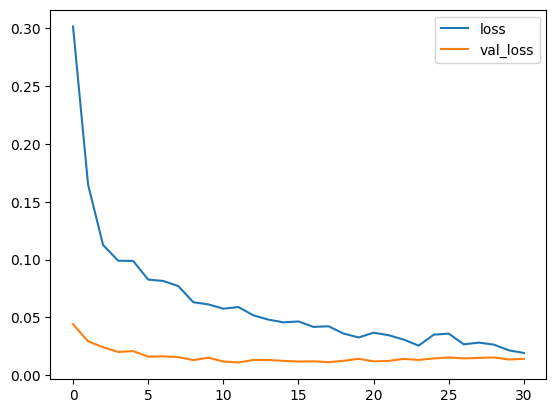

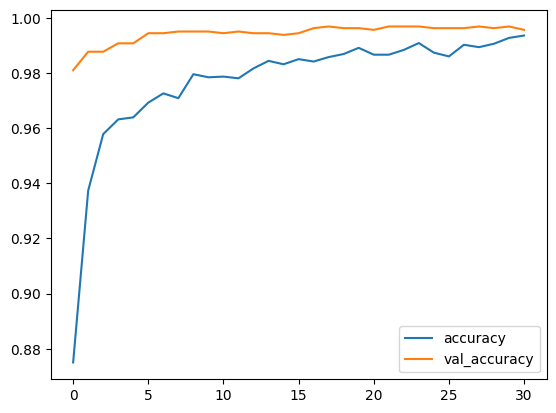

In [17]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

#### Nhận xét:
- Model đạt valid_accuracy tương đối ~ 93.34%
- => Thử thêm model khác: inception_resnet_v2, .v.v.

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [19]:
#save model
model_final.save('transfer_fish_plasticwaste_resnet50v2_model.h5')
print('save!!!')

save!!!


In [20]:
model = load_model('transfer_fish_plasticwaste_resnet50v2_model.h5')

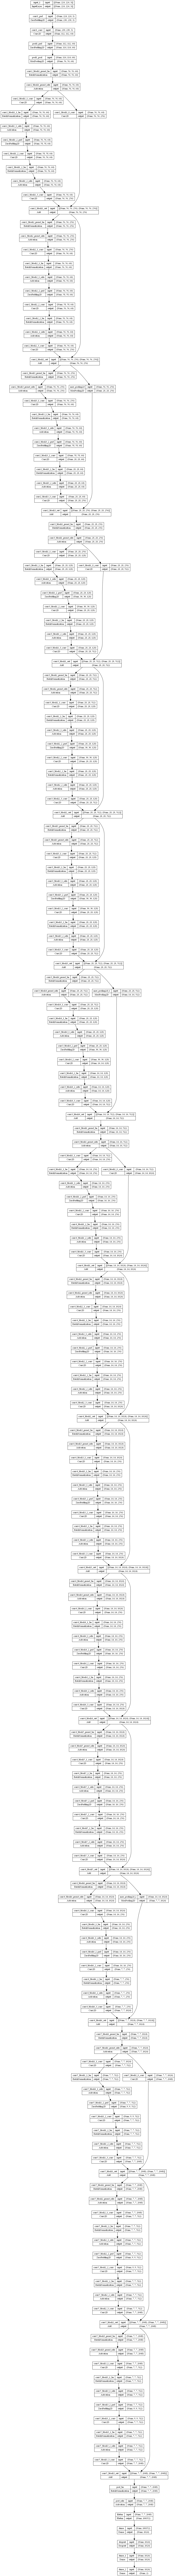

In [21]:
# # Visualize
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import pydot
plot_model(model, to_file='transfer_fish_plasticwaste_resnet50v2_model.png', show_shapes= True)
Image(filename= 'transfer_fish_plasticwaste_resnet50v2_model.png')

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [23]:
def result(test_image):
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis= 0)
    result = model.predict(test_image)

    # 0 la glass, 1 la plastic, nguong sigmoid = 0.5
    if result[0][0] >= 0.5:
        prediction = 'Fish'
    else:
        prediction = 'PlasticWaste'
    return prediction

In [24]:
train_evaluation= model.evaluate(train_generator)
test_evaluation= model.evaluate(validation_generator)
print('Train Accuracy:', round(train_evaluation[1], 4), 
        '; Train loss:', round(train_evaluation[0], 4))
print('Test Accuracy:', round(test_evaluation[1], 4), 
        '; Test loss:', round(test_evaluation[0], 4))

52/52 [==============================] - 8s 153ms/step - loss: 0.0141 - accuracy: 0.9957
Train Accuracy: 0.9963 ; Train loss: 0.012
Test Accuracy: 0.9957 ; Test loss: 0.0141


In [25]:
import os 
predict_path= r'dataset\single_prediction\\'
list_image= os.listdir(predict_path)

In [26]:
df= pd.DataFrame(columns=['name_file', 'truth', 'predict'])
name_file=[]
truth=[]
predict=[]

In [27]:
for i in range(len(list_image)):
    path= predict_path + list_image[i]
    test_img= image.load_img(path, target_size=[img_width, img_height])
    name_file.append(list_image[i])
    truth.append(list_image[i].split('_')[0])
    predict.append(result(test_img))

df['name_file']= name_file
df['truth']= truth
df['predict']= predict
df.to_csv('prediction_fish_and_plasticwaste_resnet50v2.csv')

1/1 [==============================] - 0s 50ms/step


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
confusion_matrix(df['truth'], df['predict'])

array([[50,  0],
       [ 1, 49]], dtype=int64)

In [30]:
print(classification_report(df['truth'], df['predict']))

              precision    recall  f1-score   support

        Fish       0.98      1.00      0.99        50
PlasticWaste       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

